![I2A2_logo](https://user-images.githubusercontent.com/67437213/161177329-fb0c61e2-318b-4edd-8cb9-6349206a6e9b.JPG)

# Autor

[<img src="https://avatars.githubusercontent.com/u/67437213?v=4" width=180><br><sub>Igor Nogueira da Silva</sub>](https://github.com/igors96)

LinkedIn: https://www.linkedin.com/in/igor-nogueira-da-silva-84426b169/

GitHub: https://github.com/igors96

# Objetivo
Conseguir identificar famílias baseando-se em dados de expressão genética de 48 pessoas.

# Metodologia

Serão utilizados neste trabalho a linguagem *Python* para modificações necessárias nos dados, e do software *Orange Data Mining* para clusterização do conjunto de dados. Dois cenários gerais serão estudados: um baseado na soma das colunas dos genes e outro baseado na amplitude dessas colunas. A ideia é extrair em diferentes testes os genes que melhor contribuem para o conjunto de dados, no intuito de excluir aqueles que possuam uma expressão pouco relevante.

Para montagem destes testes, será usado como base este artigo:
https://education.myheritage.com.br/article/whats-considered-a-strong-dna-match/#:~:text=Quanto%20mais%20DNA%20voc%C3%AA%20compartilha,%2C%20tias%2C%20sobrinhos%20e%20sobrinhas

que possui o seguinte período: "Quanto mais DNA você compartilha com um indivíduo, mais recente é o seu ancestral em comum. Você compartilha cerca de 50% do seu DNA com seus pais e filhos, 25% com seus avós e netos e 12.5% com seus primos, tios, tias, tias, sobrinhos e sobrinhas."

Sendo assim, 3 testes serão idealizados: 50%, 75% (50% + 25%) e 87.5% (50% + 25% + 12.5%) do número total de expressões genéticas.

Além disso, será realizada uma verificação com 95% para comparação do número de genes que equivalem a esta porcentagem em relação ao número total de genes.

In [ ]:
# Importação de bibliotecas e carregamento do dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dados = pd.read_excel('/content/readcounts.xlsx')

In [ ]:
dados.shape

(65215, 49)

In [ ]:
dados.head()

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47


In [ ]:
# Transpondo o dataset. Assim, as pessoas ficam nas linhas e os genes nas colunas
dados = dados.T

In [ ]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,65205,65206,65207,65208,65209,65210,65211,65212,65213,65214
Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Vamos guardar em um novo objeto as alterações que serão realizadas
dados2 = dados.drop('Unnamed: 0')

In [ ]:
dados2

,0,1,2,3,4,5,6,7,8,9,...,65205,65206,65207,65208,65209,65210,65211,65212,65213,65214
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropando colunas que contenham valores vazios, caso haja ocorrências
dados2 = dados2.dropna(axis = 1)

In [ ]:
# Guardando numa lista todas as somas de cada coluna do dataset
colunas_somadas = []
for coluna in dados2:
    soma_colunas = dados2[coluna].sum()    
    colunas_somadas.append(soma_colunas)

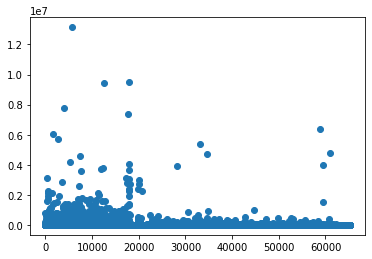

In [ ]:
# Verificando a distribuição das somas de cada coluna
x = range(0,65215,1)
y = colunas_somadas

plt.scatter(x, y)
plt.show()

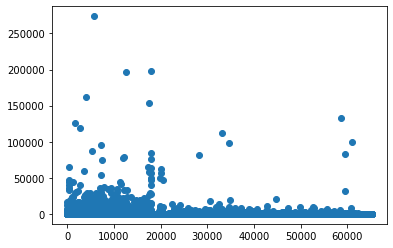

In [ ]:
# Verificando a distribuição das médias de cada coluna
x = range(0,65215,1)
y = dados2.mean()

plt.scatter(x, y)
plt.show()

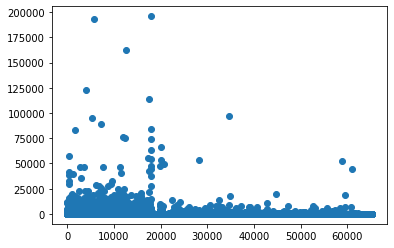

In [ ]:
# Verificando a distribuição das medianas de cada coluna
x = range(0,65215,1)
y = dados2.median()

plt.scatter(x, y)
plt.show()

A partir dos 3 gráficos acima, é possível constatar que a maior parte dos dados estão numa base próxima a zero, o que nos motiva a retirar genes que contribuem em menor expressão.

In [ ]:
# Dropando colunas que possuem todos os valores iguais a 0
nunique = dados2.nunique()
cols_to_drop = nunique[nunique == 1].index
dados2 = dados2.drop(cols_to_drop, axis=1)
dados2

,0,1,2,3,4,5,6,7,8,9,...,65183,65184,65188,65191,65195,65196,65201,65204,65210,65212
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,1,19,0,18,0,0,1,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,18,0,0,0,0,1,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,11,0,10,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,23,0,36,0,0,2,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,7,1,17,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,11,0,1,0,0,5,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,11,0,6,0,1,3,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,19,0,1,0,0,2,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,8,0,28,0,0,1,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,2,0,0,0,0,1,0,0


Somente retirando as colunas que apenas possuíam zeros, o número de genes caiu de 65.215 para 44.678, o que representa uma queda de 31,5%.

In [ ]:
# Vamos ordenar aquela lista de colunas somadas para a ordem decrescente a fim de usá-la como base para fazermos as próximas subdivisões no dataset
colunas_somadas_2 = sorted(colunas_somadas, reverse = True)

In [ ]:
# Soma de todas as colunas
sum(colunas_somadas_2)

807401174

In [ ]:
# 95% do total de genes
lim_95 = 807401174 * 0.95
lim_95

767031115.3

In [ ]:
soma_acumulada = 0
colunas = 0

for i in colunas_somadas_2:
    if soma_acumulada <= lim_95:
        soma_acumulada += i
        colunas += 1

print(soma_acumulada)
print(colunas-1)

767032093
6394


In [ ]:
colunas_somadas_2_atualizado = colunas_somadas_2[:6394]

In [ ]:
colunas_somadas_2_atualizado[6393]

14064

In [ ]:
# Criação de um DataFrame que contém os genes que somados equivalem a 95% do total de expressões.
dados3 = pd.DataFrame()
for coluna in dados2:
    if dados2[coluna].sum() >= 14064:
        dados3[coluna] = dados2[coluna]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados3

,2,5,7,8,9,16,22,23,28,29,...,61054,61210,61385,61466,61719,62133,62364,62500,63138,64941
H223,1216,31895,763,8963,1589,685,322,1677,315,17853,...,4401,1211,888,752,1222,530,1394,673,478,738
H224,1228,23361,712,26794,1734,654,386,2547,613,18959,...,10523,1146,1409,755,1078,403,1802,319,540,714
H225,1022,27944,956,8027,1341,500,326,2463,339,14546,...,8915,1204,1474,548,917,409,1882,344,358,628
H226,912,41846,1104,716,1053,958,1399,2360,398,7402,...,1352,1100,148,579,1108,620,2560,1053,405,607
H227,491,11929,136,745,730,451,4163,1355,254,2694,...,128455,752,1081,550,588,191,1877,29,248,230
H228,449,6856,227,3770,663,526,4459,2259,483,3134,...,260457,704,1131,596,594,175,1673,48,231,277
H229,466,6756,217,1260,669,461,5608,2463,341,1921,...,228036,733,1261,540,533,144,1840,38,207,298
H230,727,7668,905,1480,883,932,2232,3255,610,7248,...,2095,860,186,535,996,552,1349,1179,342,496
H231,774,9315,94,75,873,381,2743,2339,86,2889,...,48674,888,289,494,679,225,1266,68,367,263
H232,576,3319,88,288,678,193,2381,2780,264,745,...,315956,408,499,477,595,129,1893,33,255,232


In [ ]:
dados3.to_excel('readcounts_95_soma.xlsx')

In [ ]:
# 87.5% do total de genes
lim_87_5 = 807401174 * 0.875
lim_87_5

706476027.25

In [ ]:
soma_acumulada_2 = 0
colunas_2 = 0

for i in colunas_somadas_2:
    if soma_acumulada_2 <= lim_87_5:
        soma_acumulada_2 += i
        colunas_2 += 1

print(soma_acumulada_2)
print(colunas_2-1)

706499171
3761


In [ ]:
colunas_somadas_3 = colunas_somadas_2[:3761]

In [ ]:
colunas_somadas_3[3760]

35685

In [ ]:
# Criação de um DataFrame que contém os genes que somados equivalem a 87.5% do total de expressões.
dados4 = pd.DataFrame()
for coluna in dados2:
    if dados2[coluna].sum() >= 35685:
        dados4[coluna] = dados2[coluna]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados4.to_excel('readcounts_87_5_soma.xlsx')

In [ ]:
# 75% do total de genes
lim_75 = 807401174 * 0.75
lim_75

605550880.5

In [ ]:
soma_acumulada_3 = 0
colunas_3 = 0

for i in colunas_somadas_2:
    if soma_acumulada_3 <= lim_75:
        soma_acumulada_3 += i
        colunas_3 += 1

print(soma_acumulada_3)
print(colunas_3)

605626804
1885


In [ ]:
colunas_somadas_4 = colunas_somadas_2[:1885]

In [ ]:
colunas_somadas_4[1884]

79771

In [ ]:
# Criação de um DataFrame que contém os genes que somados equivalem a 75% do total de expressões.
dados5 = pd.DataFrame()
for coluna in dados2:
    if dados2[coluna].sum() >= 79771:
        dados5[coluna] = dados2[coluna]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados5.to_excel('readcounts_75_soma.xlsx')

In [ ]:
# 50% do total de genes
lim_50 = 807401174 * 0.5
lim_50

403700587.0

In [ ]:
soma_acumulada_4 = 0
colunas_4 = 0

for i in colunas_somadas_2:
    if soma_acumulada_4 <= lim_50:
        soma_acumulada_4 += i
        colunas_4 += 1

print(soma_acumulada_4)
print(colunas_4-1)

403883021
457


In [ ]:
colunas_somadas_5 = colunas_somadas_2[:457]

In [ ]:
colunas_somadas_5[456]

285554

In [ ]:
# Criação de um DataFrame que contém os genes que somados equivalem a 50% do total de expressões.
dados6 = pd.DataFrame()
for coluna in dados2:
    if dados2[coluna].sum() >= 285554:
        dados6[coluna] = dados2[coluna]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados6.to_excel('readcounts_50_soma.xlsx')

Trabalharemos agora a ideia da amplitude. Usaremos como base a média das amplitudes de cada coluna do dataset. Serão filtrados os datasets anteriormente gerados de modo que permaneçam os genes que possuem amplitude maior ou igual à média. Com isso, teremos os genes com maiores amplitudes, o que pode auxiliar na diferenciação entre pessoas destes genes.

In [ ]:
amplitude_dados2 = []
for coluna in dados2:
    amplitude = dados2[coluna].max() - dados2[coluna].min()
    amplitude_dados2.append(amplitude)

In [ ]:
# Média amplitudes - dataset sem zeros
media_amplitudes_2 = sum(amplitude_dados2)/len(amplitude_dados2)
media_amplitudes_2

1071.092103496128

In [ ]:
lista_amplitudes_media_2 = []
colunas_amplitudes_2 = 0

for coluna in dados2:
    amplitude = dados2[coluna].max() - dados2[coluna].min()
    if amplitude >= media_amplitudes_2:
        lista_amplitudes_media_2.append(amplitude)
        colunas_amplitudes_2 += 1

In [ ]:
# Criação de um DataFrame que contém os genes que possuem amplitudes iguais ou maiores que a média das amplitudes. Dataset sem zeros. 
dados7 = pd.DataFrame()
for coluna in dados2:
    if (dados2[coluna].max() - dados2[coluna].min()) >= media_amplitudes_2:
        dados7[coluna] = dados2[coluna]
    else:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados7.to_excel('readcounts_sem_0_amplitude.xlsx')

In [ ]:
amplitude_dados3 = []
for coluna in dados3:
    amplitude = dados3[coluna].max() - dados3[coluna].min()
    amplitude_dados3.append(amplitude)

In [ ]:
# Média amplitudes - dataset 95% do total de genes
media_amplitudes_3 = sum(amplitude_dados3)/len(amplitude_dados3)
media_amplitudes_3

7037.521739130435

In [ ]:
lista_amplitudes_media_3 = []
colunas_amplitudes_3 = 0

for coluna in dados3:
    amplitude = dados3[coluna].max() - dados3[coluna].min()
    if amplitude >= media_amplitudes_3:
        lista_amplitudes_media_3.append(amplitude)
        colunas_amplitudes_3 += 1

In [ ]:
# Criação de um DataFrame que contém os genes que possuem amplitudes iguais ou maiores que a média das amplitudes. Dataset 95% do total de genes.
dados8 = pd.DataFrame()
for coluna in dados3:
    if (dados3[coluna].max() - dados3[coluna].min()) >= media_amplitudes_3:
        dados8[coluna] = dados3[coluna]
    else:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados8.to_excel('readcounts_95_amplitude.xlsx')

In [ ]:
amplitude_dados4 = []
for coluna in dados4:
    amplitude = dados4[coluna].max() - dados4[coluna].min()
    amplitude_dados4.append(amplitude)

In [ ]:
# Média amplitudes - dataset 87.5% do total de genes
media_amplitudes_4 = sum(amplitude_dados4)/len(amplitude_dados4)
media_amplitudes_4

11046.820260568998

In [ ]:
lista_amplitudes_media_4 = []
colunas_amplitudes_4 = 0

for coluna in dados4:
    amplitude = dados4[coluna].max() - dados4[coluna].min()
    if amplitude >= media_amplitudes_4:
        lista_amplitudes_media_4.append(amplitude)
        colunas_amplitudes_4 += 1

In [ ]:
# Criação de um DataFrame que contém os genes que possuem amplitudes iguais ou maiores que a média das amplitudes. Dataset 87.5% do total de genes.
dados9 = pd.DataFrame()
for coluna in dados4:
    if (dados4[coluna].max() - dados4[coluna].min()) >= media_amplitudes_4:
        dados9[coluna] = dados4[coluna]
    else:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados9.to_excel('readcounts_87_5_amplitude.xlsx')

In [ ]:
amplitude_dados5 = []
for coluna in dados5:
    amplitude = dados5[coluna].max() - dados5[coluna].min()
    amplitude_dados5.append(amplitude)

In [ ]:
# Média amplitudes - dataset 75% do total de genes
media_amplitudes_5 = sum(amplitude_dados5)/len(amplitude_dados5)
media_amplitudes_5

19285.99575596817

In [ ]:
lista_amplitudes_media_5 = []
colunas_amplitudes_5 = 0

for coluna in dados5:
    amplitude = dados5[coluna].max() - dados5[coluna].min()
    if amplitude >= media_amplitudes_5:
        lista_amplitudes_media_5.append(amplitude)
        colunas_amplitudes_5 += 1

In [ ]:
# Criação de um DataFrame que contém os genes que possuem amplitudes iguais ou maiores que a média das amplitudes. Dataset 75% do total de genes.
dados10 = pd.DataFrame()
for coluna in dados5:
    if (dados5[coluna].max() - dados5[coluna].min()) >= media_amplitudes_5:
        dados10[coluna] = dados5[coluna]
    else:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados10.to_excel('readcounts_75_amplitude.xlsx')

In [ ]:
amplitude_dados6 = []
for coluna in dados6:
    amplitude = dados6[coluna].max() - dados6[coluna].min()
    amplitude_dados6.append(amplitude)

In [ ]:
# Média amplitudes - dataset 50% do total de genes
media_amplitudes_6 = sum(amplitude_dados6)/len(amplitude_dados6)
media_amplitudes_6

55984.603938730856

In [ ]:
lista_amplitudes_media_6 = []
colunas_amplitudes_6 = 0

for coluna in dados6:
    amplitude = dados6[coluna].max() - dados6[coluna].min()
    if amplitude >= media_amplitudes_6:
        lista_amplitudes_media_6.append(amplitude)
        colunas_amplitudes_6 += 1

In [ ]:
# Criação de um DataFrame que contém os genes que possuem amplitudes iguais ou maiores que a média das amplitudes. Dataset 50% do total de genes.
dados11 = pd.DataFrame()
for coluna in dados6:
    if (dados6[coluna].max() - dados6[coluna].min()) >= media_amplitudes_6:
        dados11[coluna] = dados6[coluna]
    else:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
dados11.to_excel('readcounts_50_amplitude.xlsx')

# Modelagem dos testes no *Orange Data Mining*

Foram 9 testes no total:
- Soma acumulada 95%
- Soma acumulada 87.5%
- Soma acumulada 75%
- Soma acumulada 50%
- Amplitude com dados sem colunas de zeros
- Amplitude 95%
- Amplitude 87.5%
- Amplitude 75% 
- Amplitude 50%

![orange_data_mining_test](https://user-images.githubusercontent.com/67437213/161431916-51ae949c-23e9-4cb0-b704-299a2951e437.JPG)

Os 9 testes foram modelados no Orange Data Mining com a mesma estrutura da imagem acima. Foi aplicada uma normalização dos dados no intervalo [0,1]; após, aplicou-se um PCA de modo que o número de componentes principais correspondesse a 90% de variância explicada (ao todo 10 componentes principais foram necessários em cada teste).

Em seguida, aplicou-se um clusterizador k-means com número de clusters que tivesse maior *Silhouette Score* e que estivesse em concordância com o observado no Scatter Plot, com uma separação adequada dos clusters. Apenas no último teste (Amplitude 50%) observou-se a necessidade do número de clusters ser diferente de 3, no qual utilizou-se 5 clusters.

Com auxílio da utilidade "Hierarchical Clustering" e como base a distância euclidiana entre cada pessoa do *dataset*, foram gerados dendrogramas para cada teste, conforme as imagens a seguir:

### Soma acumulada 95%

![1](https://user-images.githubusercontent.com/67437213/161394602-2ac40994-9d64-4ab2-ab7c-a30badcb73ff.JPG)


### Soma acumulada 87.5%
![2](https://user-images.githubusercontent.com/67437213/161394636-30f6fa17-89a8-496c-bb0d-69adc83c2e40.JPG)


### Soma acumulada 75%
![3](https://user-images.githubusercontent.com/67437213/161394652-78272037-d790-44fb-bb24-e86e6327ce69.JPG)


### Soma acumulada 50%
![4](https://user-images.githubusercontent.com/67437213/161394671-af29c6e3-87e3-4e9f-9f9a-109ee7170206.JPG)


### Amplitude - Dados sem colunas de zeros
![5](https://user-images.githubusercontent.com/67437213/161394680-ca6935d5-a7d8-4f77-b5b3-01261a539940.JPG)


### Amplitude 95%
![6](https://user-images.githubusercontent.com/67437213/161394688-8a18b574-edf6-4177-968f-88b61f5b3e5e.JPG)


### Amplitude 87.5%
![7](https://user-images.githubusercontent.com/67437213/161394703-09ba7966-9ab6-4eda-88ce-b37582355b72.JPG)


### Amplitude 75%
![8](https://user-images.githubusercontent.com/67437213/161399147-6ec3a788-87e1-420c-b3a9-7af26b284212.JPG)


### Amplitude 50%
![9](https://user-images.githubusercontent.com/67437213/161394736-1d198f37-9da7-41a1-89e0-70c20042d634.JPG)


# Análise dos resultados

Os resultados dos dendrogramas foram inseridos numa tabela, a fim de verificar a presença de padrões entre um dendrograma e outro. Cada valor da tabela é a identificação de uma pessoa. A nomenclatura da base de dados original deste trabalho referencia cada pessoa com valores que vão de 'H223' até 'H270', agora são usados números de 1 a 48 que na prática representam exatamente as mesmas pessoas nesta ordem, ou seja, 1 equivale a 'H223', 2 a 'H224' e assim por diante.

In [ ]:
# Carregamento da tabela
clusters = pd.read_excel('/content/Hierarchical Clustering.xlsx')

In [ ]:
clusters

,Soma 95 C1,Soma 95 C2,Soma 95 C3,Soma 87.5 C1,Soma 87.5 C2,Soma 87.5 C3,Soma 75 C1,Soma 75 C2,Soma 75 C3,Soma 50 C1,...,Amplitude 87.5 C2,Amplitude 87.5 C3,Amplitude 75 C1,Amplitude 75 C2,Amplitude 75 C3,Amplitude 50 C1,Amplitude 50 C2,Amplitude 50 C3,Amplitude 50 C4,Amplitude 50 C5
0,20.0,2.0,22,20.0,15.0,22,24.0,13.0,30,32.0,...,27.0,30,30.0,27,21.0,48.0,1.0,6.0,45.0,29.0
1,24.0,3.0,23,24.0,13.0,23,16.0,14.0,31,24.0,...,39.0,31,31.0,39,9.0,16.0,25.0,7.0,46.0,18.0
2,32.0,1.0,21,32.0,14.0,21,28.0,3.0,29,48.0,...,2.0,17,6.0,2,33.0,28.0,27.0,30.0,47.0,19.0
3,48.0,25.0,33,48.0,1.0,33,32.0,15.0,6,16.0,...,26.0,41,7.0,26,11.0,32.0,2.0,31.0,10.0,5.0
4,16.0,37.0,34,16.0,25.0,34,48.0,25.0,7,28.0,...,38.0,42,5.0,38,35.0,8.0,3.0,NaN,34.0,17.0
5,28.0,15.0,35,28.0,37.0,35,8.0,1.0,45,4.0,...,25.0,43,29.0,25,22.0,20.0,39.0,NaN,NaN,33.0
6,12.0,13.0,10,12.0,2.0,10,20.0,37.0,46,40.0,...,1.0,18,NaN,1,23.0,44.0,26.0,NaN,NaN,9.0
7,36.0,14.0,11,36.0,3.0,11,44.0,27.0,47,12.0,...,37.0,19,NaN,37,10.0,4.0,38.0,NaN,NaN,21.0
8,4.0,26.0,9,4.0,27.0,9,4.0,39.0,42,36.0,...,3.0,6,NaN,3,34.0,40.0,41.0,NaN,NaN,22.0
9,40.0,38.0,45,40.0,39.0,45,40.0,2.0,43,8.0,...,15.0,7,NaN,15,45.0,36.0,42.0,NaN,NaN,23.0


In [ ]:
# Preenchimento de dados faltantes por zero
for coluna in clusters:
    clusters[coluna] = clusters[coluna].fillna(0)

In [ ]:
pd.set_option('display.max_columns', None)
clusters

,Soma 95 C1,Soma 95 C2,Soma 95 C3,Soma 87.5 C1,Soma 87.5 C2,Soma 87.5 C3,Soma 75 C1,Soma 75 C2,Soma 75 C3,Soma 50 C1,Soma 50 C2,Soma 50 C3,Sem 0 C1,Sem 0 C2,Sem 0 C3,Amplitude 95 C1,Amplitude 95 C2,Amplitude 95 C3,Amplitude 87.5 C1,Amplitude 87.5 C2,Amplitude 87.5 C3,Amplitude 75 C1,Amplitude 75 C2,Amplitude 75 C3,Amplitude 50 C1,Amplitude 50 C2,Amplitude 50 C3,Amplitude 50 C4,Amplitude 50 C5
0,20.0,2.0,22,20.0,15.0,22,24.0,13.0,30,32.0,3.0,30,12.0,15.0,22,4.0,25.0,21,16.0,27.0,30,30.0,27,21.0,48.0,1.0,6.0,45.0,29.0
1,24.0,3.0,23,24.0,13.0,23,16.0,14.0,31,24.0,15.0,31,36.0,13.0,23,40.0,1.0,9,28.0,39.0,31,31.0,39,9.0,16.0,25.0,7.0,46.0,18.0
2,32.0,1.0,21,32.0,14.0,21,28.0,3.0,29,48.0,13.0,29,24.0,14.0,33,16.0,37.0,33,4.0,2.0,17,6.0,2,33.0,28.0,27.0,30.0,47.0,19.0
3,48.0,25.0,33,48.0,1.0,33,32.0,15.0,6,16.0,14.0,6,32.0,26.0,9,28.0,27.0,22,40.0,26.0,41,7.0,26,11.0,32.0,2.0,31.0,10.0,5.0
4,16.0,37.0,34,16.0,25.0,34,48.0,25.0,7,28.0,25.0,7,48.0,38.0,21,12.0,39.0,23,12.0,38.0,42,5.0,38,35.0,8.0,3.0,0.0,34.0,17.0
5,28.0,15.0,35,28.0,37.0,35,8.0,1.0,45,4.0,1.0,45,8.0,27.0,34,36.0,2.0,10,36.0,25.0,43,29.0,25,22.0,20.0,39.0,0.0,0.0,33.0
6,12.0,13.0,10,12.0,2.0,10,20.0,37.0,46,40.0,37.0,46,20.0,39.0,35,8.0,26.0,11,8.0,1.0,18,0.0,1,23.0,44.0,26.0,0.0,0.0,9.0
7,36.0,14.0,11,36.0,3.0,11,44.0,27.0,47,12.0,27.0,47,44.0,2.0,10,20.0,38.0,34,20.0,37.0,19,0.0,37,10.0,4.0,38.0,0.0,0.0,21.0
8,4.0,26.0,9,4.0,27.0,9,4.0,39.0,42,36.0,39.0,19,4.0,3.0,11,44.0,3.0,35,44.0,3.0,6,0.0,3,34.0,40.0,41.0,0.0,0.0,22.0
9,40.0,38.0,45,40.0,39.0,45,40.0,2.0,43,8.0,2.0,43,40.0,1.0,45,32.0,15.0,17,32.0,15.0,7,0.0,15,45.0,36.0,42.0,0.0,0.0,23.0


Vamos separar o conjunto de dados daqueles que são do Cluster 1 em cada teste.

In [ ]:
clusters_C1 = clusters.loc[:, ['Soma 95 C1', 'Soma 87.5 C1', 'Soma 75 C1', 'Soma 50 C1', 'Sem 0 C1', 'Amplitude 95 C1', 'Amplitude 87.5 C1', 'Amplitude 75 C1', 'Amplitude 50 C1']]

In [ ]:
clusters_C1

,Soma 95 C1,Soma 87.5 C1,Soma 75 C1,Soma 50 C1,Sem 0 C1,Amplitude 95 C1,Amplitude 87.5 C1,Amplitude 75 C1,Amplitude 50 C1
0,20.0,20.0,24.0,32.0,12.0,4.0,16.0,30.0,48.0
1,24.0,24.0,16.0,24.0,36.0,40.0,28.0,31.0,16.0
2,32.0,32.0,28.0,48.0,24.0,16.0,4.0,6.0,28.0
3,48.0,48.0,32.0,16.0,32.0,28.0,40.0,7.0,32.0
4,16.0,16.0,48.0,28.0,48.0,12.0,12.0,5.0,8.0
5,28.0,28.0,8.0,4.0,8.0,36.0,36.0,29.0,20.0
6,12.0,12.0,20.0,40.0,20.0,8.0,8.0,0.0,44.0
7,36.0,36.0,44.0,12.0,44.0,20.0,20.0,0.0,4.0
8,4.0,4.0,4.0,36.0,4.0,44.0,44.0,0.0,40.0
9,40.0,40.0,40.0,8.0,40.0,32.0,32.0,0.0,36.0


Agora, vamos transformar este DataFrame em uma lista:

In [ ]:
lista_completa_C1 = []
for coluna in clusters_C1:
    a = clusters_C1[coluna].tolist()
    lista_completa_C1.append(a)

In [ ]:
lista_completa_C1

[[20.0,
  24.0,
  32.0,
  48.0,
  16.0,
  28.0,
  12.0,
  36.0,
  4.0,
  40.0,
  8.0,
  44.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [20.0,
  24.0,
  32.0,
  48.0,
  16.0,
  28.0,
  12.0,
  36.0,
  4.0,
  40.0,
  8.0,
  44.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [24.0,
  16.0,
  28.0,
  32.0,
  48.0,
  8.0,
  20.0,
  44.0,
  4.0,
  40.0,
  12.0,
  36.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [32.0,
  24.0,
  48.0,
  16.0,
  28.0,
  4.0,
  40.0,
  12.0,
  36.0,
  8.0,
  20.0,
  44.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [12.0,
  36.0,
  24.0,
  32.0,
  48.0,
  8.0,
  20.0,
  44.0,
  4.0,
  40.0,
  16.0,
  28.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [4.0,
  40.0,
  16.0,
  28.0,
  12.0,
  36.0,
  8.0,
  20.0,
  44.0,
  32.0,
  24.0,
  48.0,
  0.0,
  0.

Vamos definir uma função que transforma uma lista de listas em uma lista única:

In [ ]:
def lista_unica(lista):
    if isinstance(lista, list):
        return [sub_elem for elem in lista for sub_elem in lista_unica(elem)]
    else:
        return [lista]   

In [ ]:
# Aplicando a função:
lista_completa_C1 = lista_unica(lista_completa_C1)
lista_completa_C1

[20.0,
 24.0,
 32.0,
 48.0,
 16.0,
 28.0,
 12.0,
 36.0,
 4.0,
 40.0,
 8.0,
 44.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.0,
 24.0,
 32.0,
 48.0,
 16.0,
 28.0,
 12.0,
 36.0,
 4.0,
 40.0,
 8.0,
 44.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 24.0,
 16.0,
 28.0,
 32.0,
 48.0,
 8.0,
 20.0,
 44.0,
 4.0,
 40.0,
 12.0,
 36.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 32.0,
 24.0,
 48.0,
 16.0,
 28.0,
 4.0,
 40.0,
 12.0,
 36.0,
 8.0,
 20.0,
 44.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.0,
 36.0,
 24.0,
 32.0,
 48.0,
 8.0,
 20.0,
 44.0,
 4.0,
 40.0,
 16.0,
 28.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 40.0,
 16.0,
 28.0,
 12.0,
 36.0,
 8.0,
 20.0,
 44.0,
 32.0,
 24.0,
 48.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 28.0,
 4.0,
 40.0,
 12.0,
 36.0,
 8.0,
 20.0,
 44.0,
 32.0,
 24.0,
 

In [ ]:
# Vamos verificar quantos valores únicos há nessa lista
valores_unicos_C1 = list(set(lista_completa_C1))

In [ ]:
for valor in valores_unicos_C1:
    aparicoes_pessoa = lista_completa_C1.count(valor)
    print(valor, aparicoes_pessoa)

0.0 114
4.0 8
5.0 1
6.0 1
7.0 1
8.0 8
12.0 8
16.0 8
20.0 8
24.0 8
28.0 8
29.0 1
30.0 1
31.0 1
32.0 8
36.0 8
40.0 8
44.0 8
48.0 8


Por estes resultados, nota-se um padrão de ocorrências das pessoas 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44 e 48 formando um cluster.

In [ ]:
# Realizando o mesmo procedimento com o cluster C2
clusters_C2 = clusters.loc[:, ['Soma 95 C2', 'Soma 87.5 C2', 'Soma 75 C2', 'Soma 50 C2', 'Sem 0 C2', 'Amplitude 95 C2', 'Amplitude 87.5 C2', 'Amplitude 75 C2', 'Amplitude 50 C2']]

In [ ]:
clusters_C2

,Soma 95 C2,Soma 87.5 C2,Soma 75 C2,Soma 50 C2,Sem 0 C2,Amplitude 95 C2,Amplitude 87.5 C2,Amplitude 75 C2,Amplitude 50 C2
0,2.0,15.0,13.0,3.0,15.0,25.0,27.0,27,1.0
1,3.0,13.0,14.0,15.0,13.0,1.0,39.0,39,25.0
2,1.0,14.0,3.0,13.0,14.0,37.0,2.0,2,27.0
3,25.0,1.0,15.0,14.0,26.0,27.0,26.0,26,2.0
4,37.0,25.0,25.0,25.0,38.0,39.0,38.0,38,3.0
5,15.0,37.0,1.0,1.0,27.0,2.0,25.0,25,39.0
6,13.0,2.0,37.0,37.0,39.0,26.0,1.0,1,26.0
7,14.0,3.0,27.0,27.0,2.0,38.0,37.0,37,38.0
8,26.0,27.0,39.0,39.0,3.0,3.0,3.0,3,41.0
9,38.0,39.0,2.0,2.0,1.0,15.0,15.0,15,42.0


In [ ]:
lista_completa_C2 = []
for coluna in clusters_C2:
    b = clusters_C2[coluna].tolist()
    lista_completa_C2.append(b)

In [ ]:
lista_completa_C2 = lista_unica(lista_completa_C2)

In [ ]:
valores_unicos_C2 = list(set(lista_completa_C2))
for valor in valores_unicos_C2:
    aparicoes_pessoa = lista_completa_C2.count(valor)
    print(valor, aparicoes_pessoa)

0.0 93
1.0 9
2.0 9
3.0 9
4 1
8 1
12 1
13.0 9
14.0 9
15.0 9
16 1
20 1
24 1
25.0 9
26.0 9
27.0 9
28 1
32 1
36 1
37.0 9
38.0 9
39.0 9
40 1
41.0 1
42.0 1
43.0 1
44 1
48 1


Por estes resultados, nota-se um padrão de ocorrências das pessoas 1, 2, 3, 13, 14, 15, 25, 26, 27, 37, 38 e 39 formando outro cluster.

In [ ]:
# Realizando o mesmo procedimento com o cluster C3
clusters_C3 = clusters.loc[:, ['Soma 95 C3', 'Soma 87.5 C3', 'Soma 75 C3', 'Soma 50 C3', 'Sem 0 C3', 'Amplitude 95 C3', 'Amplitude 87.5 C3', 'Amplitude 75 C3', 'Amplitude 50 C3']]
clusters_C3

,Soma 95 C3,Soma 87.5 C3,Soma 75 C3,Soma 50 C3,Sem 0 C3,Amplitude 95 C3,Amplitude 87.5 C3,Amplitude 75 C3,Amplitude 50 C3
0,22,22,30,30,22,21,30,21.0,6.0
1,23,23,31,31,23,9,31,9.0,7.0
2,21,21,29,29,33,33,17,33.0,30.0
3,33,33,6,6,9,22,41,11.0,31.0
4,34,34,7,7,21,23,42,35.0,0.0
5,35,35,45,45,34,10,43,22.0,0.0
6,10,10,46,46,35,11,18,23.0,0.0
7,11,11,47,47,10,34,19,10.0,0.0
8,9,9,42,19,11,35,6,34.0,0.0
9,45,45,43,43,45,17,7,45.0,0.0


In [ ]:
lista_completa_C3 = []
for coluna in clusters_C3:
    c = clusters_C3[coluna].tolist()
    lista_completa_C3.append(c)

In [ ]:
lista_completa_C3 = lista_unica(lista_completa_C3)

In [ ]:
valores_unicos_C3 = list(set(lista_completa_C3))
for valor in valores_unicos_C3:
    aparicoes_pessoa = lista_completa_C3.count(valor)
    print(valor, aparicoes_pessoa)

0.0 26
5 7
6 8
7 8
9 8
10 8
11 8
17 8
18 8
19 8
21 8
22 8
23 8
29 7
30 8
31 8
33 8
34 8
35 8
41 8
42 8
43 8
45 8
46 8
47 8


Por estes resultados, nota-se um padrão de ocorrências das pessoas 5, 6, 7, 9, 10, 11, 17, 18, 19, 21, 22, 23, 29, 30, 31, 33, 34, 35, 41, 42, 43, 45, 46 e 47 formando outro cluster.

Vamos retomar o dendrograma do teste Amplitude 50%, que foi o único com aplicação de 5 clusters.

![9](https://user-images.githubusercontent.com/67437213/161394736-1d198f37-9da7-41a1-89e0-70c20042d634.JPG)

# Scatter Plot

![5 clusters](https://user-images.githubusercontent.com/67437213/161443082-16e95a7b-7f5b-41bf-a418-6b3208ed2e42.png)

Não necessariamente, a divisão dos clusters que é feita no dendrograma será a mesma do Scatter Plot oriundo do k-means. Recorda-se que o dendrograma é gerado após cálculos da distância euclidiana entre os pontos, e o k-means baseia-se na distância dos pontos a centroides. Nota-se pelo Scatter Plot uma visível separação em 5 clusters, porém destacam-se dois pontos de C3 dentro da região que provavelmente deveriam ser pertencentes ao C2. Sendo assim, baseando-se no Scatter Plot, os seguintes clusters podem ser considerados:

- 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44 e 48;
- 6, 7, 30 e 31;
- 5, 17, 18, 19, 29, 41, 42 e 43;
- 1, 2, 3, 13, 14, 15, 25, 26, 27, 37,38 e 39;
- 9, 10, 11, 21, 22, 23, 33, 34, 35, 45, 46 e 47.

# Soluções

Portanto, temos duas soluções: uma com 3 e outra com 5 famílias.

A solução 1 consiste na divisão das 48 pessoas nestas 3 famílias:
- Família 1: H226, H230, H234, H238, H242, H246, H250, H254, H258, H262, H266 e H270;
- Família 2: H223, H224, H225, H235, H236, H237, H247, H248, H249, H259, H260 e H261;
- Família 3: H227, H228, H229, H231, H232, H233, H239, H240, H241, H243, H244, H245, H251, H252, H253, H255, H256, H257, H263, H264, H265, H267, H268 e H269.

A solução 2 consiste na divisão das 48 pessoas nestas 5 famílias:
- Família 1: H226, H230, H234, H238, H242, H246, H250, H254, H258, H262, H266 e H270;
- Família 2: H228, H229, H252 e H253;
- Família 3: H227, H239, H240, H241, H251, H263, H264 e H265;
- Família 4: H223, H224, H225, H235, H236, H237, H247, H248, H249, H259, H260 e H261;
- Família 5: H231, H232, H233, H243, H244, H245, H255, H256, H257, H267, H268 e H269.